In [2]:
import pandas as pd

In [14]:
df_acp = pd.read_csv('data/acp/train_data.csv', header=0) # reading the training dataset for acp
df_acp_test = pd.read_csv('data/acp/test_data.csv', header=0) # reading the test dataset for acp


In [13]:
df_amp = pd.read_csv('data/amp/all_data.csv', header=0) # reading the training dataset for amp
# df_amp_test = pd.read_csv('data/amp/all_data.csv', header=1) # reading the test dataset for amp

In [15]:
df_dna = pd.read_csv('data/dna_binding/train.csv', header=0) # reading the training dataset for dna
df_dna_test = pd.read_csv('data/dna_binding/test.csv', header=0) # reading the test dataset for dna


In [17]:
df_dna.head()

,code,sequence,label,origin
0,Q6A8L0,MSGHSKWATTKHKKAAIDAKRGKLFARLIKNIEVAARLGGGDPSGN...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
1,Q7V7T9,MIGWLQGQKVEAWQQGTRQGVVLACAGVGYEVQIAPRHLSEMEHGQ...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
2,Q9ZUP2,MARILRNVYSLRSSLFSSELLRRSVVGTSFQLRGFAAKAKKKSKSD...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
3,Q2JVG1,MKCPRCGKQEIRVLESRSAEGGQSVRRRRECMSCGYRFTTYERIEF...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...
4,Q9K4Q3,MTKADIIEGVYEKVGFSKKESAEIVELVFDTLKETLERGDKIKISG...,1,https://github.com/hfuulgb/PDB-Fusion/tree/mai...


In [ ]:
# split sequences into single characters
df_dna_split = df_dna['sequence'].str.split(pat="", expand=True)

In [23]:
df_dna_split.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,4903,4904,4905,4906,4907,4908,4909,4910,4911,4912
5450,,M,V,I,M,A,R,P,Y,W,...,None,None,None,None,None,None,None,None,None,None
11796,,M,G,E,K,R,Q,A,R,Q,...,None,None,None,None,None,None,None,None,None,None
13155,,M,G,C,F,H,S,R,E,P,...,None,None,None,None,None,None,None,None,None,None
11616,,M,C,C,G,P,L,G,F,C,...,None,None,None,None,None,None,None,None,None,None
8696,,M,S,R,Y,R,G,P,R,L,...,None,None,None,None,None,None,None,None,None,None


In [29]:
df3 = df_dna[['code']].join(df_dna_split)

In [32]:
df_dna_01 = df3.join(df_dna[['label']])

In [33]:
df_dna_01.head(3)

,code,0,1,2,3,4,5,6,7,8,...,4904,4905,4906,4907,4908,4909,4910,4911,4912,label
0,Q6A8L0,,M,S,G,H,S,K,W,A,...,None,None,None,None,None,None,None,None,None,1
1,Q7V7T9,,M,I,G,W,L,Q,G,Q,...,None,None,None,None,None,None,None,None,None,1
2,Q9ZUP2,,M,A,R,I,L,R,N,V,...,None,None,None,None,None,None,None,None,None,1


In [34]:
df_dna_01.shape

(14189, 4915)

In [35]:
letters = ['','A', 'B', 'C', 'D', 'E', 'F', 'G','H','I','J','K','L','M',
         'N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
letter_2num = { s: i for i, s in enumerate(letters) }

In [39]:
# letter_2num

In [42]:
df_dna_01.columns[1: len(df_dna_01.columns)-1]

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       4903, 4904, 4905, 4906, 4907, 4908, 4909, 4910, 4911, 4912],
      dtype='object', length=4913)

In [43]:
# %%timeit
for column in df_dna_01.columns[1: len(df_dna_01.columns)-1]:
    df_dna_01[column] = df_dna_01[column].replace(letter_2num)

In [45]:
df_dna_01.describe()

,0,1,2,3,4,5,6,7,8,9,...,4904,4905,4906,4907,4908,4909,4910,4911,4912,label
count,14189.0,14189.000000,14189.000000,14189.000000,14189.000000,14189.000000,14189.000000,14189.000000,14189.000000,14189.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,14189.000000
mean,0.0,12.973994,11.546409,12.558884,12.797801,12.528015,12.501656,12.427091,12.355416,12.174924,...,22.0,14.0,3.0,18.0,11.0,23.0,13.0,14.0,0.0,0.502431
std,0.0,1.135561,7.110969,6.453527,6.468281,6.517397,6.522970,6.522239,6.613055,6.622168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500012
min,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,22.0,14.0,3.0,18.0,11.0,23.0,13.0,14.0,0.0,0.000000
25%,0.0,13.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,22.0,14.0,3.0,18.0,11.0,23.0,13.0,14.0,0.0,0.000000
50%,0.0,13.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,22.0,14.0,3.0,18.0,11.0,23.0,13.0,14.0,0.0,1.000000
75%,0.0,13.000000,19.000000,18.000000,19.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,22.0,14.0,3.0,18.0,11.0,23.0,13.0,14.0,0.0,1.000000
max,0.0,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,22.0,14.0,3.0,18.0,11.0,23.0,13.0,14.0,0.0,1.000000


In [50]:
df_dna_02 = df_dna_01.fillna(0)

In [51]:
df_dna_02.sample(2)

,code,0,1,2,3,4,5,6,7,8,...,4904,4905,4906,4907,4908,4909,4910,4911,4912,label
6859,P11746,0,13,19,4,9,5,5,7,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
11921,Q9EPH1,0,13,19,12,12,20,20,22,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
y_train = df_dna_02['label'].values
X_train = df_dna_02.drop(columns=['code','label']).values

In [42]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

In [43]:
X_train

array([[18, 18, 23, ...,  0,  0,  0],
       [ 7, 23, 11, ...,  0,  0,  0],
       [ 1, 12, 23, ...,  0,  0,  0],
       ...,
       [ 5, 19,  5, ..., 17,  5,  0],
       [ 6,  9, 19, ...,  0,  0,  0],
       [18, 12, 19, ...,  0,  0,  0]])

In [45]:
import numpy as np
#X_train[X_train == ''] = 0 # not needed anymore
X_train.astype(np.float64)

array([[18., 18., 23., ...,  0.,  0.,  0.],
       [ 7., 23., 11., ...,  0.,  0.,  0.],
       [ 1., 12., 23., ...,  0.,  0.,  0.],
       ...,
       [ 5., 19.,  5., ..., 17.,  5.,  0.],
       [ 6.,  9., 19., ...,  0.,  0.,  0.],
       [18., 12., 19., ...,  0.,  0.,  0.]])

In [46]:
#repeat for test data
df2 = pd.read_csv('PROTEINS/ACP/test_data.csv')
df2[['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10',
 'c11','c12','c13','c14','c15','c16','c17','c18','c19','c20',
 'c21','c22','c23','c24','c25','c26','c27','c28','c29','c30',
 'c31','c32','c33','c34','c35','c36','c37','c38','c39','c40',
 'c41','c42','c43','c44','c45','c46','c47','c48','c49',
 'c50']] = df2.apply(splitchain,axis=1)
for column in df2.columns[2:]:
    df2[column] = df2[column].replace(letter_2num)
y_test = df2['label'].values
X_test = df2.drop(columns=['sequences','label']).values
X_test.astype(np.float64)

array([[ 6., 12., 16., ...,  0.,  0.,  0.],
       [ 4., 11., 12., ...,  0.,  0.,  0.],
       [ 1., 22., 11., ...,  0.,  0.,  0.],
       ...,
       [ 6., 23.,  7., ...,  0.,  0.,  0.],
       [ 7.,  3., 12., ...,  0.,  0.,  0.],
       [ 6., 14., 18., ...,  0.,  0.,  0.]])

In [47]:
#scale the features, applying MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # YOUR CODE HERE
X_train = scaler.fit_transform(X_train) # YOUR CODE HERE
X_test = scaler.fit_transform(X_test) # YOUR CODE HERE

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
%%time
gbt_model = GradientBoostingClassifier(random_state=42) # YOUR CODE HERE
gbt_model.fit(X_train, y_train)
gbt_pred = gbt_model.predict(X_test)

CPU times: user 488 ms, sys: 8.24 ms, total: 496 ms
Wall time: 545 ms


In [50]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score as accuracy,
    recall_score as recall,
    precision_score as precision,
    f1_score
)
print("accuracy:", accuracy(y_test, gbt_pred))
print("precision:", precision(y_test, gbt_pred))
print("recall:", recall(y_test, gbt_pred))
print("f1 score:", f1_score(y_test, gbt_pred))
print("confusion matrix:")
print(confusion_matrix(y_test, gbt_pred))

accuracy: 0.7412790697674418
precision: 0.7485029940119761
recall: 0.7267441860465116
f1 score: 0.7374631268436578
confusion matrix:
[[130  42]
 [ 47 125]]


In [51]:
df.head(2)

,sequences,label,c1,c2,c3,c4,c5,c6,c7,c8,...,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50
0,RRWWRRWRRW,0,18,18,23,23,18,18,23,18,...,0,0,0,0,0,0,0,0,0,0
1,GWKSVFRKAKKVGKTVGGLALDHYLG,0,7,23,11,19,22,6,18,11,...,0,0,0,0,0,0,0,0,0,0


In [53]:
train_df = df.drop(columns=['sequences'],axis=1)
train_df = train_df.astype(float)
train_df.dtypes

label    float64
c1       float64
c2       float64
c3       float64
c4       float64
c5       float64
c6       float64
c7       float64
c8       float64
c9       float64
c10      float64
c11      float64
c12      float64
c13      float64
c14      float64
c15      float64
c16      float64
c17      float64
c18      float64
c19      float64
c20      float64
c21      float64
c22      float64
c23      float64
c24      float64
c25      float64
c26      float64
c27      float64
c28      float64
c29      float64
c30      float64
c31      float64
c32      float64
c33      float64
c34      float64
c35      float64
c36      float64
c37      float64
c38      float64
c39      float64
c40      float64
c41      float64
c42      float64
c43      float64
c44      float64
c45      float64
c46      float64
c47      float64
c48      float64
c49      float64
c50      float64
dtype: object

In [57]:
train_features = train_df
train_label = train_features.pop('label')

In [58]:
train_label

0       0.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
1373    0.0
1374    0.0
1375    0.0
1376    1.0
1377    0.0
Name: label, Length: 1378, dtype: float64

In [59]:
test_df = df2.drop(columns=['sequences'],axis=1)
test_df = test_df.astype(float)
test_features = test_df
test_label = test_features.pop('label')

In [60]:
%%time
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, 
                      population_size=16,
#                      scoring=my_custom_scorer,# YOUR CODE HERE --> this is the accuracy
                     scoring='f1',
                      verbosity=2,
                      random_state=42)
tpot.fit(train_features, train_label)
print(f"Tpop score on test data: {tpot.score(test_features, test_label):.2f}")
tpot.export('acp_pipeline.py')

Optimization Progress:   0%|          | 0/176 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7334572625009963

Generation 2 - Current best internal CV score: 0.7442189202595578

Generation 3 - Current best internal CV score: 0.7532319076736094

Generation 4 - Current best internal CV score: 0.7536963400738493

Generation 5 - Current best internal CV score: 0.7538122872429566

Generation 6 - Current best internal CV score: 0.7605530220271111

Generation 7 - Current best internal CV score: 0.7605530220271111

Generation 8 - Current best internal CV score: 0.7605530220271111

Generation 9 - Current best internal CV score: 0.7607361905025825

Generation 10 - Current best internal CV score: 0.7607361905025825

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=4, min_child_weight=14, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)
Tpop score on test data: 0.75
CPU times: user 20min 58s, sys: 11.8 s, total: 21min 10s
Wall time: 20min 32s


/Users/Gilles/anaconda3/envs/sa/lib/python3.8/site-packages/sklearn/metrics/_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [61]:
%%time
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=10, 
                      population_size=16,
#                      scoring=my_custom_scorer,# YOUR CODE HERE --> this is the accuracy
                     scoring=.999,
                      verbosity=2,
                      random_state=42)
tpot.fit(train_features, train_label)
print(f"Tpop score on test data: {tpot.score(test_features, test_label):.2f}")
tpot.export('acp_pipeline.py')

Optimization Progress:   0%|          | 0/176 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7344057971014493

Generation 2 - Current best internal CV score: 0.7344057971014493

Generation 3 - Current best internal CV score: 0.7510777338603425

Generation 4 - Current best internal CV score: 0.7510777338603425

Generation 5 - Current best internal CV score: 0.7510777338603425

Generation 6 - Current best internal CV score: 0.7590540184453227

Generation 7 - Current best internal CV score: 0.7590540184453227

Generation 8 - Current best internal CV score: 0.7612437417654808

Generation 9 - Current best internal CV score: 0.7612437417654808

Generation 10 - Current best internal CV score: 0.7612437417654808

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)
Tpop score on test data: 0.79
CPU times: user 26min 57s, sys: 14.3 s, total: 27min 11s
Wall time: 25min 57s


/Users/Gilles/anaconda3/envs/sa/lib/python3.8/site-packages/sklearn/metrics/_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [64]:
!cat acp_pipeline.py #copy some of the code generated below

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.7612437417654808
exported_pipeline = XGBClassifier(learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [69]:
#repeat for test data
df = pd.read_csv('PROTEINS/ACP/train_data.csv')
df[['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10',
 'c11','c12','c13','c14','c15','c16','c17','c18','c19','c20',
 'c21','c22','c23','c24','c25','c26','c27','c28','c29','c30',
 'c31','c32','c33','c34','c35','c36','c37','c38','c39','c40',
 'c41','c42','c43','c44','c45','c46','c47','c48','c49',
 'c50']] = df.apply(splitchain,axis=1)
for column in df.columns[2:]:
    df[column] = df[column].replace(letter_2num)
train_df = df.drop(columns=['sequences'],axis=1)
train_df = train_df.astype(float)
train_df.head(2)

,label,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50
0,0.0,18.0,18.0,23.0,23.0,18.0,18.0,23.0,18.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,7.0,23.0,11.0,19.0,22.0,6.0,18.0,11.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# NOTE: Modifying suggested code to take existing df and target = label
tpot_data = train_df
features = tpot_data.drop('label', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['label'], random_state=42)

# Average CV score on the training set was: 0.7612437417654808
exported_pipeline = XGBClassifier(learning_rate=0.1, max_depth=9, min_child_weight=5, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [74]:
testing_features.head(2)# 

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50
597,7.0,12.0,6.0,4.0,9.0,22.0,11.0,11.0,9.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700,11.0,12.0,11.0,14.0,6.0,1.0,11.0,7.0,22.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
test_df.head(2)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,...,c41,c42,c43,c44,c45,c46,c47,c48,c49,c50
0,6.0,12.0,16.0,12.0,12.0,12.0,19.0,1.0,12.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,11.0,12.0,9.0,7.0,19.0,3.0,22.0,23.0,12.0,...,23.0,3.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# we run the predict on our test data. The testing features above came from the train_df
predictions = exported_pipeline.predict(test_df)

In [76]:
test_label.head(2)

0    0.0
1    0.0
Name: label, dtype: float64

In [79]:
print("accuracy:", accuracy(test_label, predictions))
print("precision:", precision(test_label, predictions))
print("recall:", recall(test_label, predictions))
print("f1 score:", f1_score(test_label, predictions))
print("confusion matrix:")
print(confusion_matrix(test_label, predictions))

accuracy: 0.75
precision: 0.7415730337078652
recall: 0.7674418604651163
f1 score: 0.7542857142857143
confusion matrix:
[[126  46]
 [ 40 132]]


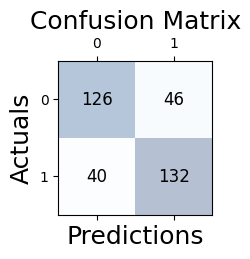

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
conf_matrix = confusion_matrix(test_label, predictions)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()